***
## <font color="#106eb2" size=10>  Análise Value Releance de indicadores da B3 entre 2008 e 2019 </font>
***



## <font color="#1D334A" size=8> Conhecendo os Dados</font>

Esta primeira aula é dedicada a realizar uma análise inicial de uma amostra de dados dos participantes do ENEM 2019.

É importante conhecer a semântica dos dados descrita no dicionário de dados. A exploração inicial, o conhecimento do negócio, e do dicionário de dados é importante para a formulação de hipóteses.

Os dados foram extraídos de http://inep.gov.br/microdados




### Importando bibliotecas

In [1]:
import pandas as pd
import numpy as np



### Exploração Inicial

Os dados estão apresentados em milhares (ou seja, o valor real dividido por mil), exceto retorno das ações que está em sua escala real.

RET- retorno das ações ((Preço final da ação - Preço inicial da ação) + Dividendos) / Preço inicial da ação))

REC - Receita líquida
EBITDA - Earnings before interest, taxes, depreciation and amortization.
EBIT - Earnings before interest, taxes
LAIR - Lucro antes do Imposto de Renda
LAOD - Lucro antes das despesas extraodinarias 
LL - Lucro líquido
FCO - Fluxo de Caixa Operacional

In [2]:
caminho = 'DadosB3.xls'
dados = pd.read_excel(caminho)
dados.head()

,NUM,RET,REC,EBITDA,EBIT,LAIR,LAOD,LL,FCO,ANO
0,1,0.274809,66895.0,5256.0,2732.0,1663.0,1709.0,1709.0,-47884.0,2019
1,2,0.263549,528009.0,287487.0,205061.0,104794.0,105558.0,105558.0,161816.0,2019
2,3,-0.061674,262156.0,59898.0,30495.0,14020.0,10054.0,7442.0,61421.0,2019
3,4,0.226506,756219.0,206293.0,176078.0,240410.0,182058.0,118428.0,202109.0,2019
4,5,0.069928,1369412.0,664921.0,632805.0,560224.0,348360.0,166323.0,-250804.0,2019


### Observando as dimensões do dataframe - linhas e colunas

In [3]:
dados.shape

(6817, 10)

In [4]:
dados

,NUM,RET,REC,EBITDA,EBIT,LAIR,LAOD,LL,FCO,ANO
0,1,0.274809,66895.0,5256.0,2732.0,1663.0,1709.0,1709.0,-47884.0,2019
1,2,0.263549,528009.0,287487.0,205061.0,104794.0,105558.0,105558.0,161816.0,2019
2,3,-0.061674,262156.0,59898.0,30495.0,14020.0,10054.0,7442.0,61421.0,2019
3,4,0.226506,756219.0,206293.0,176078.0,240410.0,182058.0,118428.0,202109.0,2019
4,5,0.069928,1369412.0,664921.0,632805.0,560224.0,348360.0,166323.0,-250804.0,2019
...,...,...,...,...,...,...,...,...,...,...
6812,6813,0.062125,931907.0,184535.0,140388.0,127559.0,89819.0,119645.0,150487.0,2010
6813,6814,0.161394,52348.0,6824.0,5158.0,3017.0,2195.0,2195.0,-1877.0,2010
6814,6815,-0.011594,1870433.0,315364.0,289551.0,284485.0,230982.0,222822.0,282526.0,2010
6815,6816,0.080086,216258.0,42427.0,25427.0,18296.0,11075.0,11075.0,53062.0,2010


In [5]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6817 entries, 0 to 6816
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   NUM     6817 non-null   int64  
 1   RET     6817 non-null   float64
 2   REC     6817 non-null   float64
 3   EBITDA  6817 non-null   float64
 4   EBIT    6817 non-null   float64
 5   LAIR    6817 non-null   float64
 6   LAOD    6817 non-null   float64
 7   LL      6817 non-null   float64
 8   FCO     6817 non-null   float64
 9   ANO     6817 non-null   int64  
dtypes: float64(8), int64(2)
memory usage: 532.7 KB


In [6]:
dados.dtypes

NUM         int64
RET       float64
REC       float64
EBITDA    float64
EBIT      float64
LAIR      float64
LAOD      float64
LL        float64
FCO       float64
ANO         int64
dtype: object

In [7]:
dados.describe()

,NUM,RET,REC,EBITDA,EBIT,LAIR,LAOD,LL,FCO,ANO
count,6817.000000,6817.000000,6.817000e+03,6.817000e+03,6.817000e+03,6.817000e+03,6.817000e+03,6.817000e+03,6.817000e+03,6817.000000
mean,3409.000000,-0.016621,2.139960e+06,4.066918e+05,2.498605e+05,1.431239e+05,1.018608e+05,9.894324e+04,3.438234e+05,2014.748276
std,1968.042725,0.296684,6.919675e+06,1.985561e+06,1.524561e+06,1.492767e+06,1.191814e+06,1.186449e+06,1.758761e+06,2.850646
min,1.000000,-6.559322,-8.485330e+05,-3.151265e+07,-4.223400e+07,-4.716200e+07,-3.558200e+07,-3.693800e+07,-1.024331e+07,2010.000000
25%,1705.000000,-0.108616,1.424910e+05,9.884000e+03,3.728000e+03,-5.347000e+03,-4.595000e+03,-4.706000e+03,-1.000000e+00,2012.000000
50%,3409.000000,0.019355,4.177660e+05,6.794400e+04,4.518000e+04,2.524200e+04,1.928200e+04,1.879400e+04,3.640000e+04,2015.000000
75%,5113.000000,0.133929,1.407520e+06,2.735400e+05,1.936710e+05,1.283470e+05,9.776800e+04,9.274000e+04,1.898210e+05,2017.000000
max,6817.000000,1.946854,9.826000e+07,5.380500e+07,3.923700e+07,3.066100e+07,3.052641e+07,3.054336e+07,3.282400e+07,2019.000000


### Vendo o nome das colunas do dataframe

In [8]:
dados.columns.values

array(['NUM', 'RET', 'REC', 'EBITDA', 'EBIT', 'LAIR', 'LAOD', 'LL', 'FCO',
       'ANO'], dtype=object)

### Selecionando SubConjuntos do Dataframe

Um subconjunto bidimensional de um dataframe, também será um dataframe.

Quando este subconjunto for unidimensional o seu tipo será um objeto do tipo Pandas Series. Diversos são as operações disponíveis para lidar com Series. 

Veja a documentação em: https://pandas.pydata.org/pandas-docs/stable/reference/series.html  

In [9]:
dados['LL']

0         1709.0
1       105558.0
2         7442.0
3       118428.0
4       166323.0
          ...   
6812    119645.0
6813      2195.0
6814    222822.0
6815     11075.0
6816     25438.0
Name: LL, Length: 6817, dtype: float64

In [10]:
dados.LL

0         1709.0
1       105558.0
2         7442.0
3       118428.0
4       166323.0
          ...   
6812    119645.0
6813      2195.0
6814    222822.0
6815     11075.0
6816     25438.0
Name: LL, Length: 6817, dtype: float64

In [11]:
sub = dados[['RET', 'LL']].copy()
sub

,RET,LL
0,0.274809,1709.0
1,0.263549,105558.0
2,-0.061674,7442.0
3,0.226506,118428.0
4,0.069928,166323.0
...,...,...
6812,0.062125,119645.0
6813,0.161394,2195.0
6814,-0.011594,222822.0
6815,0.080086,11075.0


In [12]:
dados[0:752]

,NUM,RET,REC,EBITDA,EBIT,LAIR,LAOD,LL,FCO,ANO
0,1,0.274809,66895.0,5256.0,2732.0,1663.0,1709.0,1709.0,-47884.0,2019
1,2,0.263549,528009.0,287487.0,205061.0,104794.0,105558.0,105558.0,161816.0,2019
2,3,-0.061674,262156.0,59898.0,30495.0,14020.0,10054.0,7442.0,61421.0,2019
3,4,0.226506,756219.0,206293.0,176078.0,240410.0,182058.0,118428.0,202109.0,2019
4,5,0.069928,1369412.0,664921.0,632805.0,560224.0,348360.0,166323.0,-250804.0,2019
...,...,...,...,...,...,...,...,...,...,...
747,748,0.243902,45107.0,-2517.0,-3641.0,-7045.0,-7144.0,-7141.0,-2496.0,2019
748,749,-0.068519,378846.0,123877.0,72882.0,51641.0,23744.0,21925.0,100288.0,2019
749,750,0.242921,187596.0,10093.0,9317.0,9145.0,6664.0,6630.0,-2681.0,2019
750,751,0.065789,932626.0,384633.0,291001.0,246746.0,240797.0,240797.0,200719.0,2019


In [13]:
dados.iloc[0:752, 2:4]

,REC,EBITDA
0,66895.0,5256.0
1,528009.0,287487.0
2,262156.0,59898.0
3,756219.0,206293.0
4,1369412.0,664921.0
...,...,...
747,45107.0,-2517.0
748,378846.0,123877.0
749,187596.0,10093.0
750,932626.0,384633.0


### Selecionando apenas retornos postivos para os acionistas e resultado positvo da empresa

In [14]:
dados.query('RET > 0 & LL > 0')

,NUM,RET,REC,EBITDA,EBIT,LAIR,LAOD,LL,FCO,ANO
0,1,0.274809,66895.0,5256.0,2732.0,1663.0,1709.0,1709.0,-47884.0,2019
1,2,0.263549,528009.0,287487.0,205061.0,104794.0,105558.0,105558.0,161816.0,2019
3,4,0.226506,756219.0,206293.0,176078.0,240410.0,182058.0,118428.0,202109.0,2019
4,5,0.069928,1369412.0,664921.0,632805.0,560224.0,348360.0,166323.0,-250804.0,2019
5,6,0.018467,15856798.0,6583427.0,5319312.0,3755048.0,4218978.0,4099705.0,9634853.0,2019
...,...,...,...,...,...,...,...,...,...,...
6807,6808,0.194227,3042799.0,759185.0,559204.0,439587.0,328786.0,318906.0,413708.0,2010
6808,6809,0.133858,12583322.0,5167621.0,3807316.0,2470616.0,2824063.0,2879344.0,2465127.0,2010
6812,6813,0.062125,931907.0,184535.0,140388.0,127559.0,89819.0,119645.0,150487.0,2010
6813,6814,0.161394,52348.0,6824.0,5158.0,3017.0,2195.0,2195.0,-1877.0,2010


### Identificando o domínio de uma coluna

In [15]:
dados.ANO.unique()

array([2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010],
      dtype=int64)

In [16]:
dados.ANO.unique().size

10

### Verificando de quantidade de amostras por ano

In [17]:
dados.ANO.value_counts()

2018    760
2019    751
2017    751
2016    718
2015    694
2014    666
2013    642
2012    639
2011    627
2010    569
Name: ANO, dtype: int64

## Avaliação Visual Com Histograma

### "Plot" dos dados da coluna Retorno das ações

<AxesSubplot:>

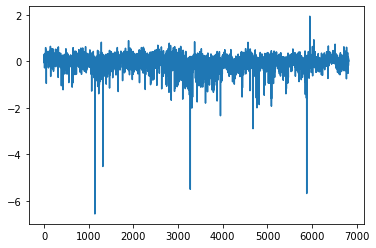

In [18]:
dados.RET.plot()

### Avaliação Visual do Retorno das ações (Histograma)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

dados.RET.plot(bins=12, kind='hist', figsize=(12, 8))

### Investigando Prejuízo por ano

In [ ]:
dados.query('LL < 0').ANO.hist(bins=25)

### Avaliação Empresas possivelmente inoperantes


In [ ]:
dados.query('REC <=0 ').ANO.hist(bins=25)

In [ ]:
dados.query('REC <= 0').ANO.value_counts()

### Avaliação Visual das empresas com problemas de caixa

In [ ]:
dados.query('FCO <= 0').ANO.hist(bins=25)

In [ ]:
dados.query('FCO <= 0').ANO.value_counts()

### Agrupando Lucro médio por ano e Retorno médio por ano

In [ ]:
dados.head()
dados.groupby("ANO").LL.mean().round(2)

In [ ]:
dados.head()
dados.groupby("ANO").RET.mean().round(2)

### Criando Categorias por faixas de valores

In [ ]:
print(dados.RET.min())
print(dados.RET.max())

In [ ]:
faixas=[-7, -5, -3, 0, 1, 2]
rotulos = ['-7 a -5', '-5 a -3', '-3 a 0', '0 a 1', '1 a 2']
redacao_classes = pd.cut(x=dados.RET, bins=faixas, labels=rotulos, include_lowest=False)
redacao_classes.value_counts(sort=False, normalize=False) * 100

## Resumindo os dados

### Medidas de Tendência Central 

In [ ]:
print(dados.RET.mean())
print(dados.RET.median())
#print(dados.RET.mode())

### Medidas de Dispersão

In [ ]:
print(dados.RET.mad())
print(dados.RET.var())
print(dados.RET.std())

In [ ]:
print(f'Media / Desvio da nota de matemática: {dados.RET.mean()} / {dados.RET.std()}')
print(f'Media / Desvio da nota de linguagens: {dados.RET.mean()} / {dados.RET.std()}')

### Medidas Separatrizes:

In [ ]:
dados.LL.quantile([0.25, 0.5, 0.75, 1])

###  Medidas Separatrizes: Percentiles e Quartiles

In [ ]:
nota_sup = dados.LL.quantile(0.95)
print(f'Apenas 5% dos lucros estão acima de {nota_sup} ')

In [ ]:
dados.LL.max()

### Estatísticas Descritivas das variáveis explicatixas

In [ ]:
explicativas=['REC', 'EBITDA', 'EBIT', 'LAIR', 'LAOD', 'LL', 'FCO']

dados[explicativas].describe()

## Avaliação Visual Com Boxplots

O uso de boxplot permite visualizar medidas centrais, de dispersão e outliers (medidas discrepantes), além da assimetria da distribuição

<img src='img/boxplot.png' width='65%'>

### Visualizando a distribuição dos retornos

In [ ]:
dados.RET.plot.box(figsize=(12,8))

In [ ]:

iiq = dados.RET.quantile(0.75) - dados.RET.quantile(0.25)
dados.RET.quantile(0.25) - (iiq * 1.5)

## <font color="#1D334A" size=8> Análise Exploratória: Visualizando os dados </font>

### Biblioteca Seaborn: Visualizando a distribuição dos Lucros e Fluxo de Caixa Opercaional

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import GridSpec

fig = plt.figure(constrained_layout=True)
fig.set_size_inches(12, 8)
gs = GridSpec(2,1, figure=fig)

ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[1, 0])

sns.set_style("whitegrid")
sns.boxplot(data=dados.LL, orient='h', palette='Accent', ax= ax0)
#ax.figure.set_size_inches(12,6)
ax0.set_title('Distribuição da variável Lucro Líquido', fontsize=14)
ax0.set_xlabel('Notas', fontsize=16)
ax0.set_xlim(xmin=dados.LL.min()*1.05, xmax=dados.LL.max() * 1.05)
ax0.grid(True)

ax1.set_title('Distribuição da variável Fluxo de caixa Operacional', fontsize=14)
sns.boxplot(data=dados.FCO, orient='h', palette='Accent', ax= ax1)
ax1.set_xlabel('Notas', fontsize=16)
ax1.set_xlim(xmin=dados.FCO.min()*1.05, xmax=dados.FCO.max() * 1.05)
ax1.grid(True)

Paleta de Cores Pré-Fixadas no seaborn

'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r'

## Explorando os dados de Retorno Negativo

In [ ]:

dados.query('RET < 0').ANO.value_counts()



In [ ]:
dados.query('RET < 0').ANO.value_counts(normalize=True) *100


In [ ]:
retornoNegativo = pd.DataFrame()
retornoNegativo['QTDE'] = dados.query('RET < 0').ANO.value_counts()
retornoNegativo['PercRET'] = dados.query('RET < 0').ANO.value_counts(normalize=True) *100

retornoNegativo

## Escolhendo a melhor visualização para estes dados

## Gráfico de Pizza - Pie Chart

In [ ]:

bx = retornoNegativo.plot.pie(subplots=True)


In [ ]:
sns.set_style('whitegrid')
ax = sns.barplot(x=retornoNegativo.index, y= retornoNegativo.QTDE,
             palette=sns.color_palette(palette="husl", n_colors=30, desat=None))
ax.figure.set_size_inches(5, 4)
ax.set_yticks([x for x in range(19)])
ax.set_title('Retornos Negativos', fontsize=12)

## Análise Exploratória 

## Examinando o comportamento do boxplot através do histograma de Retorno

In [ ]:
sns.set_style('whitegrid')
ax = sns.histplot(data = dados.RET, 
                  palette=sns.color_palette(palette="husl", n_colors=1,
                                              desat=None))
ax.set_title('Distribuição da Frequencia do retorno das ações', fontsize=25)
ax.figure.set_size_inches(12,6)
ax

In [ ]:
from scipy.stats import normaltest
significancia = 0.10
stat_test, p_value = normaltest(dados.query('RET > -3').RET)
p_value

## <font color="#1D334A" size=8> Distribuições e Correlações</font>

## Correlações

### Correlação entre Notas de RET x LL

In [ ]:
fig, ax0 = plt.subplots()
fig.set_size_inches(5, 5)
sns.scatterplot(x = 'RET', y = 'LL', data = dados, color='#BF9500', ax=ax0)
ax0.set_xlim(-10, 50)
ax0.set_ylim(-10, 50)
ax0.set_xlabel('Retorno das ações', fontsize=22)
ax0.set_ylabel('Lucro Líquido', fontsize=22)

## Correlação entre Notas de MT x Notas de LC e uma terceira dimensão (acesso a internet)

In [ ]:
fig, ax0 = plt.subplots()
fig.set_size_inches(10, 10)
sns.scatterplot(x = 'RET', y = 'LL', data = dados, palette='summer_r', ax=ax0, hue='ANO', alpha=0.9)
ax0.set_xlim(-1000, 1000)
ax0.set_ylim(-1000, 1000)
ax0.set_xlabel('Retorno das ações', fontsize=22)
ax0.set_ylabel('Lucro Líquido', fontsize=22)

## Correlação entre Itens do Demostrativo de Resultado - Pearson




Correlação é qualquer relação estatística (causal ou não causal) entre duas variáveis.

Embora seja comumente denotada como a medida de relação entre duas variáveis aleatórias, correlação não implica causalidade.

Correlações espúrias: https://www.tylervigen.com/spurious-correlations


<img src='img/pearson.png' width='65%'>

In [ ]:
explicativas = dados[['REC', 'EBITDA', 'EBIT', 'LAIR', 'LAOD','LL', 'FCO']].copy()

In [ ]:
correlacao_dre = explicativas.corr()

correlacao_dre

## Interpretação dos valores da Correlação

<img src='img/pearson02.png' width='65%'>

## Visualização da Correlação entre Itens Demonstrativo de Resultado

In [ ]:
ax = sns.heatmap(correlacao_dre, cmap="summer_r", square=True, annot=True)
ax.set_title('Mapa de Correlação de Pearson dos itens do DRE', fontsize=22, y=1.05)

## <font color="#1D334A" size=8> Regressão</font>

## Avaliação de Modelos Preditivos - Métricas

### Preparando dados de treino e gerando dados de avaliação da predição

In [ ]:
explicada = dados[['RET']].copy()
y = explicada

In [ ]:
import statsmodels.api as sm

X = explicativas
X_Const = sm.add_constant(X)
model = sm.OLS(y, X_Const).fit()
print(model.summary())

> R-squared é o percentual da variação da variável dependente que um modelo linear consegue explicar. Varia de 0% (quando, o modelo não explica qualquer variação da variável resposta em torno do seu valor médio) a 100% (quando, o modelo explica toda variação da variável resposta em torno do seu valor médio)

> Adjusted R-squared considera o número de termos no modelo. Quando um novo termo não melhora o R-squared, o modelo perde em liberdade e Adjusted R-squared diminui de valor.

> F-statistic e Prob (F-statistic): O Teste F serve para verificar se ao menos uma variável explicativa contribui significativamente para o modelo. O Teste F compara um modelo sem preditores com o modelo de regressão especificado. Um modelo de regressão que não contém preditores também é conhecido como um modelo somente com o intercepto. Na prática ele compara se o seu modelo é melhor do que um outro que simplesmente retorna a média da variável dependente. o Prob (F-statistic) testa o nível de significância de rejeição da hipótese nula (o ajuste do modelo somente com o intercepto e seu modelo são iguais). Costuma-se considerar um valor abaixo de 5% como estatisticamente relevante.

> P>|t| é o equivalente a Prob (F-statistic) considerando cada variável individualmente

